## Tutorial

Database of Essential Genes (DEG) analysis needs:
- Expression data
- Gene annotation data
- Metadata regarding sample group or sample phenotype condition



In [1]:
getwd()

[1] "/home/sunzid/Research/24_LSU Brain"

In [1]:
setwd("GSE63477/")
library(GEOquery)

Loading required package: Biobase

Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)



In [2]:
my_id <- "GSE63477"
gse <- getGEO(my_id)

Found 1 file(s)

GSE63477_series_matrix.txt.gz



In [3]:
gse <- gse[[1]]
gse

ExpressionSet (storageMode: lockedEnvironment)
assayData: 44629 features, 12 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1550559 GSM1550560 ... GSM1550570 (12 total)
  varLabels: title geo_accession ... treatment:ch1 (35 total)
  varMetadata: labelDescription
featureData
  featureNames: 16657436 16657440 ... 17118478 (44629 total)
  fvarLabels: ID RANGE_STRAND ... RANGE_GB (8 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
Annotation: GPL16686 

In [4]:
pData(gse)[1:2, ] ## print the sample information

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_institute,contact_address,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,cell line:ch1,treatment:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1550559,"LNCaP CTRL treated in charcoal dextran treated serum, replicate 1",GSM1550559,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550559/suppl/GSM1550559_01_LN_CDT-CTRL_1.CEL.gz,44629,LNCaP,CTRL treated in charcoal dextran treated serum
GSM1550560,"LNCaP CTRL treated in charcoal dextran treated serum, replicate 2",GSM1550560,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550560/suppl/GSM1550560_01_LN_CTS-CTRL_2.CEL.gz,44629,LNCaP,CTRL treated in charcoal dextran treated serum


In [5]:
fData(gse)[1, ] ## print the gene annotation

,ID,RANGE_STRAND,RANGE_START,RANGE_END,total_probes,GB_ACC,SPOT_ID,RANGE_GB
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>
16657436,16657436,+,12190,13639,25,NR_046018,chr1:12190-13639,NC_000001.10


In [6]:
exprs(gse)[1, ] ## print the expression data

GSM1550559 GSM1550560 GSM1550561 GSM1550562 GSM1550563 GSM1550564 GSM1550565 
  24.63215   21.96198   24.36674   24.28032   24.82574   22.72258   25.76430 
GSM1550566 GSM1550567 GSM1550568 GSM1550569 GSM1550570 
  23.03947   24.45452   23.74868   23.77131   21.67176

Check normalization and scales used

In [7]:
pData(gse)$data_processing[1]

[1] "Data were processed with GenSpring 11.5 software. The expression data were RMA normalized, and filtered to remove low-expressing genes."

In [8]:
# For visualisation and statistical analysis, we will inspect the data to 
# discover what scale the data are presented in. The methods we will use assume 
# the data are on a log2 scale; typically in the range of 0 to 16.

## have a look on the expression value
summary(exprs(gse))

   GSM1550559        GSM1550560        GSM1550561        GSM1550562     
 Min.   :  17.42   Min.   :  17.49   Min.   :  17.54   Min.   :  17.44  
 1st Qu.:  19.59   1st Qu.:  19.53   1st Qu.:  19.59   1st Qu.:  19.45  
 Median :  22.29   Median :  22.34   Median :  22.39   Median :  22.43  
 Mean   :  48.09   Mean   :  48.51   Mean   :  48.08   Mean   :  48.91  
 3rd Qu.:  33.45   3rd Qu.:  33.90   3rd Qu.:  33.70   3rd Qu.:  33.92  
 Max.   :5889.83   Max.   :6043.74   Max.   :5907.55   Max.   :6087.95  
   GSM1550563        GSM1550564        GSM1550565        GSM1550566     
 Min.   :  17.48   Min.   :  17.47   Min.   :  17.43   Min.   :  17.49  
 1st Qu.:  19.48   1st Qu.:  19.51   1st Qu.:  19.59   1st Qu.:  19.54  
 Median :  22.19   Median :  22.22   Median :  22.38   Median :  22.29  
 Mean   :  49.16   Mean   :  48.72   Mean   :  48.29   Mean   :  48.83  
 3rd Qu.:  33.70   3rd Qu.:  33.84   3rd Qu.:  33.49   3rd Qu.:  33.85  
 Max.   :5991.22   Max.   :5827.09   Max.   :5704.8

In [9]:
# From this output we clearly see that the values go beyond 16, 
# so we need to perform a log2 transformation.
exprs(gse) <- log2(exprs(gse))

# check again the summary
summary(exprs(gse))

   GSM1550559       GSM1550560       GSM1550561       GSM1550562    
 Min.   : 4.122   Min.   : 4.128   Min.   : 4.133   Min.   : 4.124  
 1st Qu.: 4.292   1st Qu.: 4.288   1st Qu.: 4.292   1st Qu.: 4.282  
 Median : 4.479   Median : 4.482   Median : 4.485   Median : 4.488  
 Mean   : 4.887   Mean   : 4.892   Mean   : 4.887   Mean   : 4.890  
 3rd Qu.: 5.064   3rd Qu.: 5.083   3rd Qu.: 5.075   3rd Qu.: 5.084  
 Max.   :12.524   Max.   :12.561   Max.   :12.528   Max.   :12.572  
   GSM1550563       GSM1550564       GSM1550565       GSM1550566    
 Min.   : 4.128   Min.   : 4.127   Min.   : 4.123   Min.   : 4.128  
 1st Qu.: 4.284   1st Qu.: 4.286   1st Qu.: 4.292   1st Qu.: 4.288  
 Median : 4.472   Median : 4.474   Median : 4.484   Median : 4.478  
 Mean   : 4.893   Mean   : 4.892   Mean   : 4.887   Mean   : 4.892  
 3rd Qu.: 5.075   3rd Qu.: 5.081   3rd Qu.: 5.066   3rd Qu.: 5.081  
 Max.   :12.549   Max.   :12.509   Max.   :12.478   Max.   :12.536  
   GSM1550567       GSM1550568    

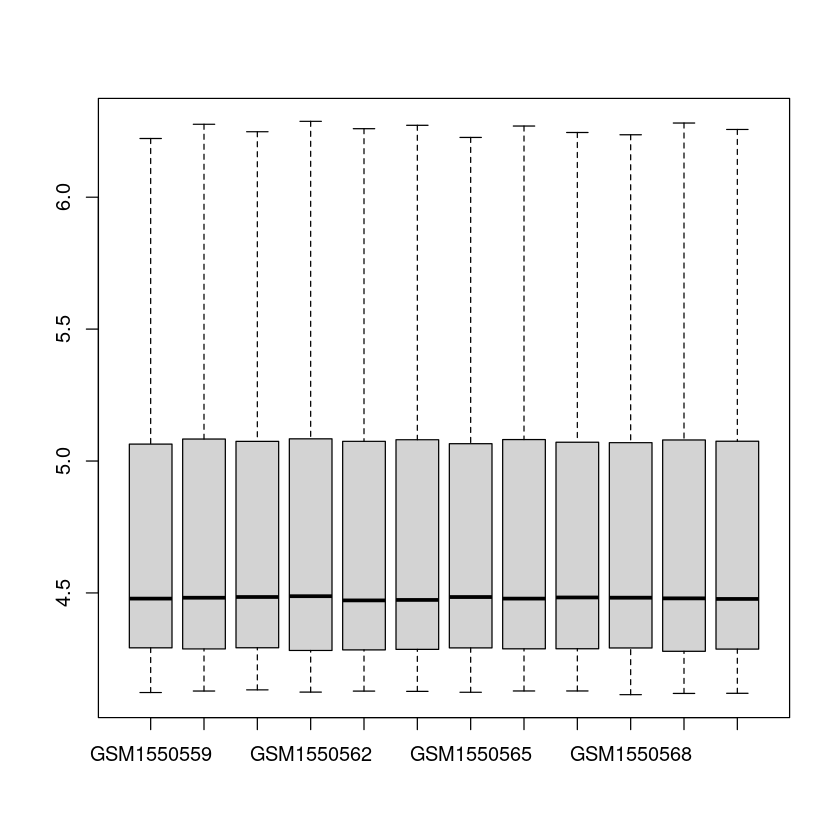

In [10]:
boxplot(exprs(gse), outline = FALSE)

Inspect the clinical variables

In [11]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
sampleInfo <- pData(gse)
head(sampleInfo)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_institute,contact_address,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,cell line:ch1,treatment:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1550559,"LNCaP CTRL treated in charcoal dextran treated serum, replicate 1",GSM1550559,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550559/suppl/GSM1550559_01_LN_CDT-CTRL_1.CEL.gz,44629,LNCaP,CTRL treated in charcoal dextran treated serum
GSM1550560,"LNCaP CTRL treated in charcoal dextran treated serum, replicate 2",GSM1550560,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550560/suppl/GSM1550560_01_LN_CTS-CTRL_2.CEL.gz,44629,LNCaP,CTRL treated in charcoal dextran treated serum
GSM1550561,"LNCaP 16h cabazitaxel (1nM) treated in charcoal dextran treated serum, replicate 1",GSM1550561,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550561/suppl/GSM1550561_02_LN-CDT_CBTX_2.CEL.gz,44629,LNCaP,16h cabazitaxel (1nM) treated in charcoal dextran treated serum
GSM1550562,"LNCaP 16h cabazitaxel (1nM) treated in charcoal dextran treated serum, replicate 2",GSM1550562,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550562/suppl/GSM1550562_02_LN_CDT-CBTX_1.CEL.gz,44629,LNCaP,16h cabazitaxel (1nM) treated in charcoal dextran treated serum
GSM1550563,"LNCaP 16h docetaxel (1nM) treated in charcoal dextran treated serum, replicate 1",GSM1550563,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550563/suppl/GSM1550563_03_LN-CDT-DCTX_1.CEL.gz,44629,LNCaP,16h docetaxel (1nM) treated in charcoal dextran treated serum
GSM1550564,"LNCaP 16h docetaxel (1nM) treated in charcoal dextran treated serum, replicate 2",GSM1550564,Public on Jan 01 2015,Nov 19 2014,Jan 01 2015,RNA,1,LNCaP,Homo sapiens,cell line: LNCaP,⋯,Thomas Jefferson University - Kimmel Cancer Center,"233 S 10th St, BLSB 1008",Philadelphia,Pennsylvania,19107,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1550nnn/GSM1550564/suppl/GSM1550564_03_LN-CDT-DCTX_2.CEL.gz,44629,LNCaP,16h docetaxel (1nM) treated in charcoal dextran treated serum


In [13]:
table(sampleInfo$characteristics_ch1.1)


treatment: 16h cabazitaxel (1nM) treated in charcoal dextran treated serum 
                                                                         2 
                    treatment: 16h cabazitaxel (1nM) treated in full serum 
                                                                         2 
  treatment: 16h docetaxel (1nM) treated in charcoal dextran treated serum 
                                                                         2 
                      treatment: 16h docetaxel (1nM) treated in full serum 
                                                                         2 
                 treatment: CTRL treated in charcoal dextran treated serum 
                                                                         2 
                                     treatment: CTRL treated in full serum 
                                                                         2 

In [14]:
#Let's pick just those columns that contain factors we need for the analysis.
sampleInfo <- select(sampleInfo, characteristics_ch1.1)

## Optionally, rename to more convenient column names
sampleInfo <- rename(sampleInfo, sample = characteristics_ch1.1)

head(sampleInfo)

,sample
,<chr>
GSM1550559,treatment: CTRL treated in charcoal dextran treated serum
GSM1550560,treatment: CTRL treated in charcoal dextran treated serum
GSM1550561,treatment: 16h cabazitaxel (1nM) treated in charcoal dextran treated serum
GSM1550562,treatment: 16h cabazitaxel (1nM) treated in charcoal dextran treated serum
GSM1550563,treatment: 16h docetaxel (1nM) treated in charcoal dextran treated serum
GSM1550564,treatment: 16h docetaxel (1nM) treated in charcoal dextran treated serum


In [15]:
dim(sampleInfo)

[1] 12  1

In [16]:
sampleInfo$sample

[1] "treatment: CTRL treated in charcoal dextran treated serum"                 
 [2] "treatment: CTRL treated in charcoal dextran treated serum"                 
 [3] "treatment: 16h cabazitaxel (1nM) treated in charcoal dextran treated serum"
 [4] "treatment: 16h cabazitaxel (1nM) treated in charcoal dextran treated serum"
 [5] "treatment: 16h docetaxel (1nM) treated in charcoal dextran treated serum"  
 [6] "treatment: 16h docetaxel (1nM) treated in charcoal dextran treated serum"  
 [7] "treatment: CTRL treated in full serum"                                     
 [8] "treatment: CTRL treated in full serum"                                     
 [9] "treatment: 16h cabazitaxel (1nM) treated in full serum"                    
[10] "treatment: 16h cabazitaxel (1nM) treated in full serum"                    
[11] "treatment: 16h docetaxel (1nM) treated in full serum"                      
[12] "treatment: 16h docetaxel (1nM) treated in full serum"

In [17]:
library(stringr)
sampleInfo$group <- ""
for(i in 1:nrow(sampleInfo)){
  if(str_detect(sampleInfo$sample[i], "CTRL") && str_detect(sampleInfo$sample[i], "full"))
  {sampleInfo$group[i] <- "Conf"}
  
  if(str_detect(sampleInfo$sample[i], "CTRL") && str_detect(sampleInfo$sample[i], "dextran"))
  {sampleInfo$group[i] <- "Cond"}
  
  if(str_detect(sampleInfo$sample[i], "cabazitaxel") && str_detect(sampleInfo$sample[i], "full"))
  {sampleInfo$group[i] <- "cabazitaxelf"}
  
  if(str_detect(sampleInfo$sample[i], "cabazitaxel") && str_detect(sampleInfo$sample[i], "dextran"))
  {sampleInfo$group[i] <- "cabazitaxeld"}
  
  if(str_detect(sampleInfo$sample[i], "docetaxel") && str_detect(sampleInfo$sample[i], "full"))
  {sampleInfo$group[i] <- "docetaxelf"}
  
  if(str_detect(sampleInfo$sample[i], "docetaxel") && str_detect(sampleInfo$sample[i], "dextran"))
  {sampleInfo$group[i] <- "docetaxeld"}
}

sampleInfo

,sample,group
,<chr>,<chr>
GSM1550559,treatment: CTRL treated in charcoal dextran treated serum,Cond
GSM1550560,treatment: CTRL treated in charcoal dextran treated serum,Cond
GSM1550561,treatment: 16h cabazitaxel (1nM) treated in charcoal dextran treated serum,cabazitaxeld
GSM1550562,treatment: 16h cabazitaxel (1nM) treated in charcoal dextran treated serum,cabazitaxeld
GSM1550563,treatment: 16h docetaxel (1nM) treated in charcoal dextran treated serum,docetaxeld
GSM1550564,treatment: 16h docetaxel (1nM) treated in charcoal dextran treated serum,docetaxeld
GSM1550565,treatment: CTRL treated in full serum,Conf
GSM1550566,treatment: CTRL treated in full serum,Conf
GSM1550567,treatment: 16h cabazitaxel (1nM) treated in full serum,cabazitaxelf


In [18]:
sampleInfo$serum <- ""
for(i in 1:nrow(sampleInfo)){
  if(str_detect(sampleInfo$sample[i], "dextran"))
  {sampleInfo$serum[i] <- "dextran"}
  
  if(str_detect(sampleInfo$sample[i], "full"))
  {sampleInfo$serum[i] <- "full_serum"}
 
}

sampleInfo <- sampleInfo[,-1]
sampleInfo

,group,serum
,<chr>,<chr>
GSM1550559,Cond,dextran
GSM1550560,Cond,dextran
GSM1550561,cabazitaxeld,dextran
GSM1550562,cabazitaxeld,dextran
GSM1550563,docetaxeld,dextran
GSM1550564,docetaxeld,dextran
GSM1550565,Conf,full_serum
GSM1550566,Conf,full_serum
GSM1550567,cabazitaxelf,full_serum


Sample clusgtering and principal components analysis

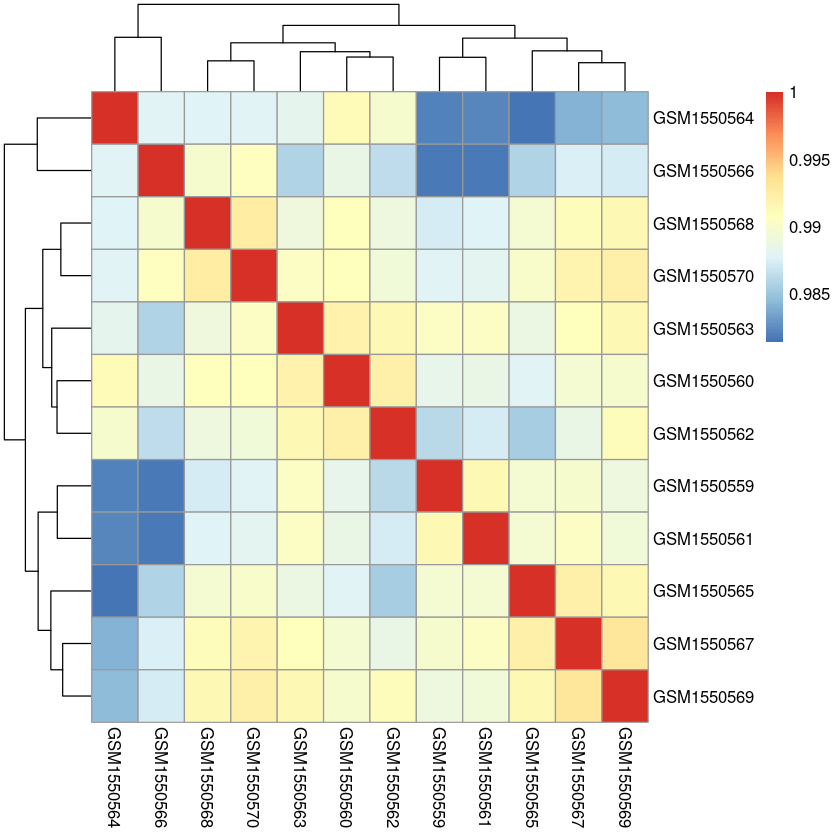

In [19]:
library(pheatmap)
## argument use="c" stops an error if there are any missing data points

corMatrix <- cor(exprs(gse),use="c")
pheatmap(corMatrix)

In [20]:
## Print the rownames of the sample information and check it matches the correlation matrix

rownames(sampleInfo)

[1] "GSM1550559" "GSM1550560" "GSM1550561" "GSM1550562" "GSM1550563"
 [6] "GSM1550564" "GSM1550565" "GSM1550566" "GSM1550567" "GSM1550568"
[11] "GSM1550569" "GSM1550570"

In [21]:
colnames(corMatrix)

[1] "GSM1550559" "GSM1550560" "GSM1550561" "GSM1550562" "GSM1550563"
 [6] "GSM1550564" "GSM1550565" "GSM1550566" "GSM1550567" "GSM1550568"
[11] "GSM1550569" "GSM1550570"

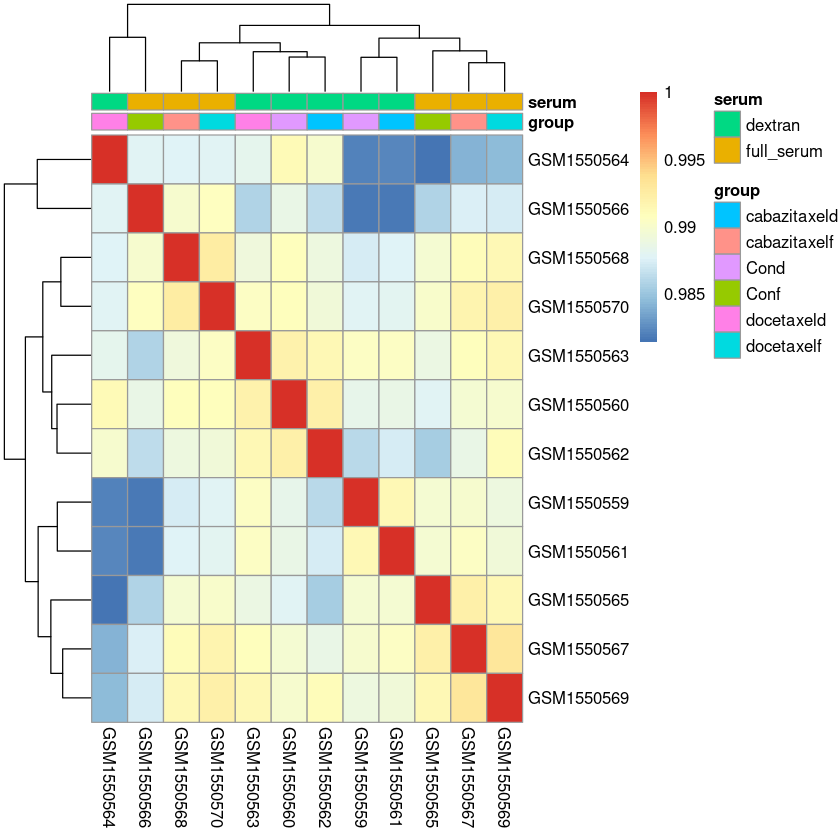

In [22]:
## If not, force the rownames to match the columns
#rownames(sampleInfo) <- colnames(corMatrix)

pheatmap(corMatrix, annotation_col= sampleInfo)

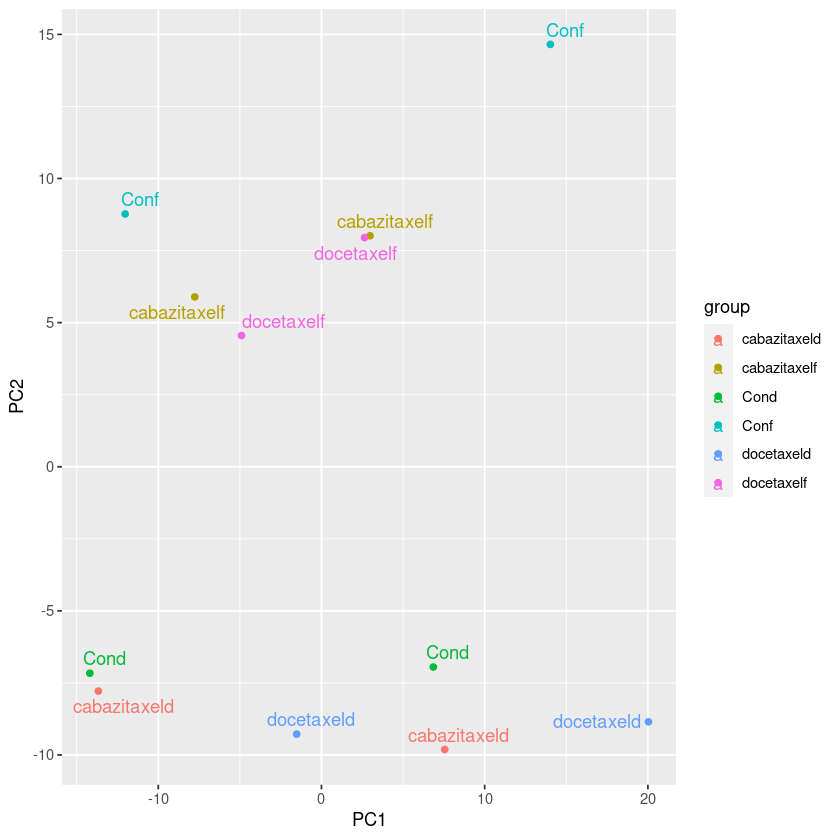

In [23]:
#make PCA
library(ggplot2)
library(ggrepel)
## MAKE SURE TO TRANSPOSE THE EXPRESSION MATRIX

pca <- prcomp(t(exprs(gse)))

## Join the PCs to the sample information
cbind(sampleInfo, pca$x) %>% 
  ggplot(aes(x = PC1, y=PC2, col=group, label=paste("",group))) + geom_point() + geom_text_repel()

In [24]:
library(limma)


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [25]:
design <- model.matrix(~0 + sampleInfo$group)
design

,sampleInfo$groupcabazitaxeld,sampleInfo$groupcabazitaxelf,sampleInfo$groupCond,sampleInfo$groupConf,sampleInfo$groupdocetaxeld,sampleInfo$groupdocetaxelf
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0
10,0,1,0,0,0,0


In [26]:
## the column names are a bit ugly, so we will rename
colnames(design) <- c("Cabazitaxeld","Cabazitaxelf","Cond","Conf","Docetaxeld","Docetaxelf")

design

,Cabazitaxeld,Cabazitaxelf,Cond,Conf,Docetaxeld,Docetaxelf
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0
10,0,1,0,0,0,0


In [27]:
## calculate median expression level
cutoff <- median(exprs(gse))

## TRUE or FALSE for whether each gene is "expressed" in each sample
is_expressed <- exprs(gse) > cutoff

## Identify genes expressed in more than 2 samples

keep <- rowSums(is_expressed) > 3

## check how many genes are removed / retained.
table(keep)

keep
FALSE  TRUE 
20965 23664 

In [28]:
## subset to just those expressed genes
gse <- gse[keep,]

In [29]:
# coping with outliers
## calculate relative array weights
aw <- arrayWeights(exprs(gse),design)
aw

1         2         3         4         5         6         7         8 
0.9704842 0.9704842 0.8790788 0.8790788 0.9799805 0.9799805 0.8296341 0.8296341 
        9        10        11        12 
1.1632620 1.1632620 1.2393733 1.2393733

In [30]:
## Fitting the coefficients
fit <- lmFit(exprs(gse), design,
             weights = aw)

head(fit$coefficients)

,Cabazitaxeld,Cabazitaxelf,Cond,Conf,Docetaxeld,Docetaxelf
16657436,4.604278,4.590902,4.539703,4.606668,4.569910,4.504447
16657440,5.073400,5.194166,5.274991,5.001295,5.230574,5.016408
16657450,6.606782,6.532054,6.571707,6.754964,6.854709,6.495389
16657469,5.318536,5.298899,5.358629,5.191262,5.398528,5.356415
16657476,5.410581,5.443410,5.358263,5.343908,5.516173,5.335881
16657480,4.481099,4.454008,4.487220,4.453781,4.418727,4.379055


In [31]:
## Making comparisons between samples, can define multiple contrasts
contrasts <- makeContrasts(Docetaxeld - Cond, Cabazitaxeld - Cond, Docetaxelf - Conf, Cabazitaxelf - Conf, levels = design)

fit2 <- contrasts.fit(fit, contrasts)
fit2 <- eBayes(fit2)


topTable(fit2)

,Docetaxeld...Cond,Cabazitaxeld...Cond,Docetaxelf...Conf,Cabazitaxelf...Conf,AveExpr,F,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16681891,-0.427866483,0.55288766,-0.02322651,-0.1414628,5.625598,43.01843,2.992480e-06,0.07081404
16840609,0.573090433,-0.20083754,-0.21477778,-0.3278230,5.769203,18.87958,1.217387e-04,0.99909331
17017165,0.116986540,-0.32582451,-0.44959204,-0.3710638,5.244400,14.18263,4.059196e-04,0.99909331
16782010,0.178206104,-0.01891042,-0.29766696,0.2850105,4.440952,14.12466,4.128114e-04,0.99909331
17099705,-0.437302094,0.02759174,-0.16952565,0.2776297,6.750407,13.62541,4.783683e-04,0.99909331
16691877,-0.149430506,-0.18664917,-0.90866405,-0.5849898,4.667038,11.52373,9.376105e-04,0.99909331
16959582,-0.006190599,-0.17371327,0.40620159,0.3098904,5.531461,11.26699,1.024647e-03,0.99909331
16970902,-0.416408859,0.01679171,-0.02017417,-0.1618155,5.237839,11.18970,1.052724e-03,0.99909331
16936214,-0.112315413,0.12707501,-0.28387277,-0.6271607,5.482977,11.17492,1.058196e-03,0.99909331


In [32]:
topTable1 <- topTable(fit2, coef=1)
topTable2 <- topTable(fit2, coef=2)
topTable3 <- topTable(fit2, coef=3)
topTable4 <- topTable(fit2, coef=4)

#if we want to know how many genes are differentially expressed overall, we can use the decideTest function.
summary(decideTests(fit2))

       Docetaxeld - Cond Cabazitaxeld - Cond Docetaxelf - Conf
Down                   0                   0                 0
NotSig             23664               23664             23664
Up                     0                   0                 0
       Cabazitaxelf - Conf
Down                     0
NotSig               23664
Up                       0

In [33]:
table(decideTests(fit2))


    0 
94656 

In [34]:
anno <- fData(gse)
head(anno)

,ID,RANGE_STRAND,RANGE_START,RANGE_END,total_probes,GB_ACC,SPOT_ID,RANGE_GB
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>
16657436,16657436,+,12190,13639,25,NR_046018,chr1:12190-13639,NC_000001.10
16657440,16657440,+,29554,31109,28,,chr1:29554-31109,NC_000001.10
16657450,16657450,+,317811,328581,36,NR_024368,chr1:317811-328581,NC_000001.10
16657469,16657469,+,329790,342507,27,,chr1:329790-342507,NC_000001.10
16657476,16657476,+,459656,461954,27,NR_029406,chr1:459656-461954,NC_000001.10
16657480,16657480,+,523009,532878,12,,chr1:523009-532878,NC_000001.10


In [35]:
anno <- select(anno,ID,GB_ACC)
fit2$genes <- anno

topTable(fit2)

,ID,GB_ACC,Docetaxeld...Cond,Cabazitaxeld...Cond,Docetaxelf...Conf,Cabazitaxelf...Conf,AveExpr,F,P.Value,adj.P.Val
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16681891,16681891,NM_001013692,-0.427866483,0.55288766,-0.02322651,-0.1414628,5.625598,43.01843,2.992480e-06,0.07081404
16840609,16840609,,0.573090433,-0.20083754,-0.21477778,-0.3278230,5.769203,18.87958,1.217387e-04,0.99909331
17017165,17017165,,0.116986540,-0.32582451,-0.44959204,-0.3710638,5.244400,14.18263,4.059196e-04,0.99909331
16782010,16782010,,0.178206104,-0.01891042,-0.29766696,0.2850105,4.440952,14.12466,4.128114e-04,0.99909331
17099705,17099705,NR_039696,-0.437302094,0.02759174,-0.16952565,0.2776297,6.750407,13.62541,4.783683e-04,0.99909331
16691877,16691877,,-0.149430506,-0.18664917,-0.90866405,-0.5849898,4.667038,11.52373,9.376105e-04,0.99909331
16959582,16959582,,-0.006190599,-0.17371327,0.40620159,0.3098904,5.531461,11.26699,1.024647e-03,0.99909331
16970902,16970902,,-0.416408859,0.01679171,-0.02017417,-0.1618155,5.237839,11.18970,1.052724e-03,0.99909331
16936214,16936214,NR_037440,-0.112315413,0.12707501,-0.28387277,-0.6271607,5.482977,11.17492,1.058196e-03,0.99909331


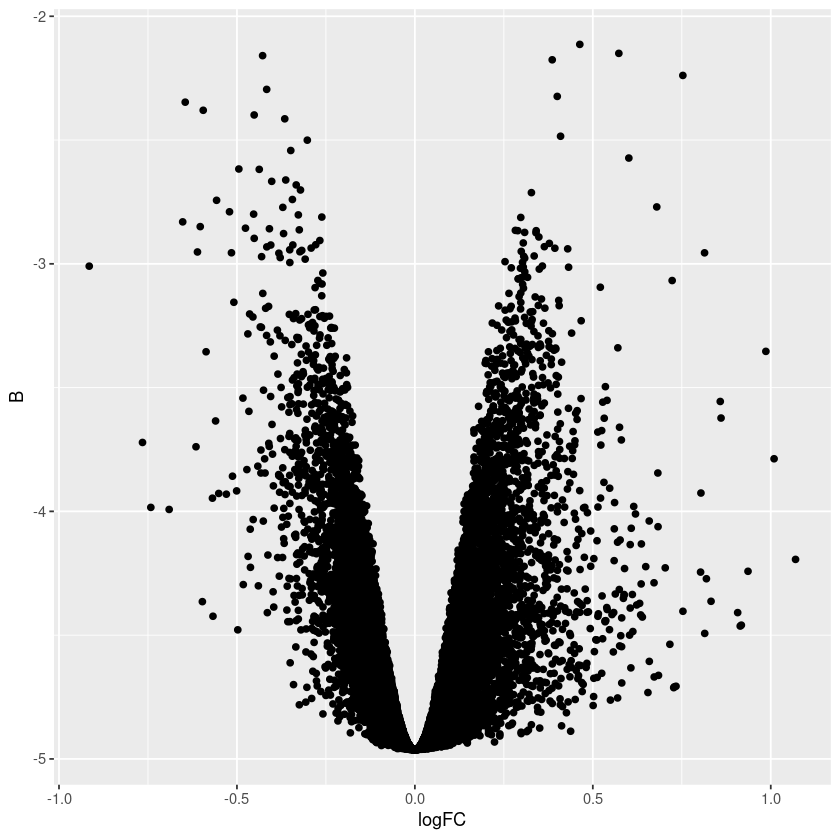

In [36]:
## Create volcano plot
full_results1 <- topTable(fit2, coef=1, number=Inf)
library(ggplot2)
ggplot(full_results1,aes(x = logFC, y=B)) + geom_point()

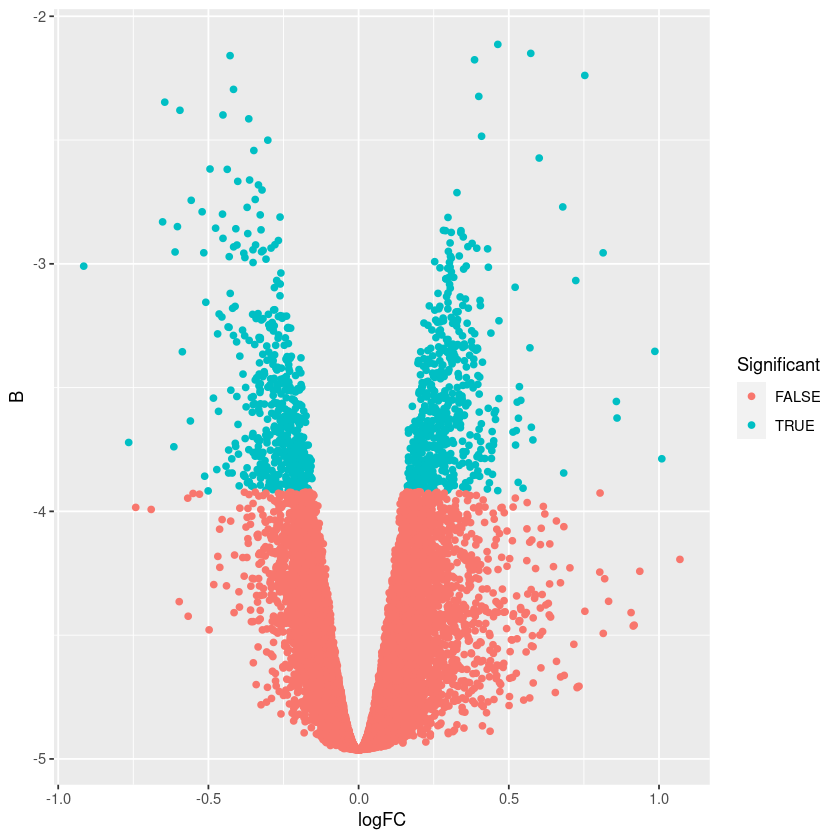

In [37]:
## change according to your needs
p_cutoff <- 0.05
fc_cutoff <- 1


full_results1 %>% 
  mutate(Significant = P.Value < p_cutoff, abs(logFC) > fc_cutoff ) %>% 
  ggplot(aes(x = logFC, y = B, col=Significant)) + geom_point()

In [38]:
## Get the results for particular gene of interest
#GB_ACC for Nkx3-1 is NM_001256339 or NM_006167
##no NM_001256339 in this data
full_results2 <- topTable(fit2, coef=2, number=Inf)
full_results3 <- topTable(fit2, coef=3, number=Inf)
full_results4 <- topTable(fit2, coef=4, number=Inf)
filter(full_results1, GB_ACC == "NM_006167")

,ID,GB_ACC,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17075536,17075536,NM_006167,-0.2379718,8.055042,-3.056052,0.01219317,0.9819604,-3.374675


In [39]:
filter(full_results2, GB_ACC == "NM_006167")

,ID,GB_ACC,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17075536,17075536,NM_006167,-0.09964001,8.055042,-1.244539,0.2418169,0.9999406,-4.561219


In [40]:
filter(full_results3, GB_ACC == "NM_006167")

,ID,GB_ACC,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17075536,17075536,NM_006167,0.02902121,8.055042,0.3762533,0.7146269,0.9999674,-4.926393


In [41]:
filter(full_results4, GB_ACC == "NM_006167")

,ID,GB_ACC,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17075536,17075536,NM_006167,0.01019426,8.055042,0.1304658,0.8987979,0.9998834,-4.95523


## LSU

### Paper: LSD induces increased signalling entropy in rats’ prefrontal cortex

In [2]:
if (getwd() != "/home/sunzid/Research/24_LSU Brain/GSE179378"){
  setwd("GSE63477/")
}
library(GEOquery)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)



In [ ]:
geo_rnaseq <- getGEO("GSE179378", GSEMatrix = TRUE)
geo_microarray <- getGEO("GSE179380", GSEMatrix = TRUE)

# Extract expression data from the GEO object
# For RNA-seq data
rnaseq_data <- as.data.frame(exprs(geo_rnaseq[[1]]))

# For microarray data
microarray_data <- as.data.frame(exprs(geo_microarray[[1]]))